# AML 3104 - Neural Networks and Deep Learning 02 (DSMM Group 2)
## Final Neural network Project ( Term 3)    

### Category: Recurrent Neural Network and LSTMs
### Topic: Time-series Forecasting

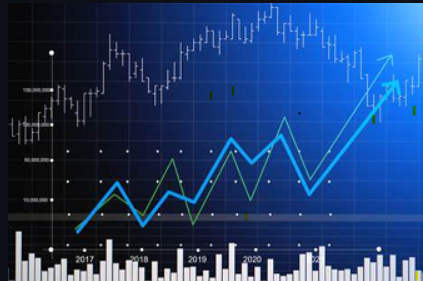

### Group members:
#### 1. Yogesh Kumar( C0852435)
#### 2. Prashant Kumar Varshney
#### 3. Husanpreet Singh Gill
#### 4. Bishal subedi

# Stock Market Analysis 📈 and  Prediction using LSTM


## Importing libraries 

In [16]:
import pandas as pd
import numpy as np
from datetime import datetime

In [10]:
!pip install yfinance
import yfinance as yf

!pip install pandas-datareader

import pandas_datareader
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

## Data extraction and preparation

In [26]:
yf.pdr_override()

end_date = datetime.now()
start_date = datetime(end.year - 1, end.month, end.day)

AAPL = pdr.DataReader('AAPL', start=start_date, end=end_date)
GOOG= pdr.DataReader('GOOG', start=start_date, end=end_date)
MSFT = pdr.DataReader('MSFT', start=start_date, end=end_date)
AMZN = pdr.DataReader('AMZN', start=start_date, end=end_date)

print(AAPL)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-03-21  163.509995  166.350006  163.009995  165.380005  164.384201   
2022-03-22  165.509995  169.419998  164.910004  168.820007  167.803497   
2022-03-23  167.990005  172.639999  167.649994  170.210007  169.185135   
2022-03-24  171.059998  174.139999  170.210007  174.070007  173.021881   
2022-03-25  173.880005  175.279999  172.750000  174.720001  173.667969   
...                ...         ...         ...         ...         ...   
2023-03-14  151.279999  153.399994  150.100006  152.589996  152.589996   
2023-03-15  151.190002  153.250000  149.919998  152.990005

In [29]:
APPL["stock_name"]="Apple"
GOOG["stock_name"]="Google"
MSFT ["stock_name"]="Microsoft"
AMZN["stock_name"]="Amazon"

In [32]:
df=pd.concat([APPL,GOOG,MSFT,AMZN],axis=0)
print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-03-21  163.509995  166.350006  163.009995  165.380005  164.384216   
2022-03-22  165.509995  169.419998  164.910004  168.820007  167.803497   
2022-03-23  167.990005  172.639999  167.649994  170.210007  169.185120   
2022-03-24  171.059998  174.139999  170.210007  174.070007  173.021896   
2022-03-25  173.880005  175.279999  172.750000  174.720001  173.667984   
...                ...         ...         ...         ...         ...   
2023-03-14   93.830002   95.070000   92.709999   94.879997   94.879997   
2023-03-15   93.220001   96.669998   93.070000   96.199997   96.199997   
2023-03-16   95.750000  100.989998   95.610001  100.040001  100.040001   
2023-03-17   99.790001  100.660004   97.459999   98.949997   98.949997   
2023-03-20   98.410004   98.480003   95.699997   97.709999   97.709999   

              Volume stock_name  
Dat

## Preliminary Data Analysis